## **Task 2**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
x = df.iloc[:, [3, 4]].values

In [ ]:
wcss = []

k = range(1, 11)

for i in k:
    kmeans = KMeans(n_clusters=i, init = "k-means++", random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128]

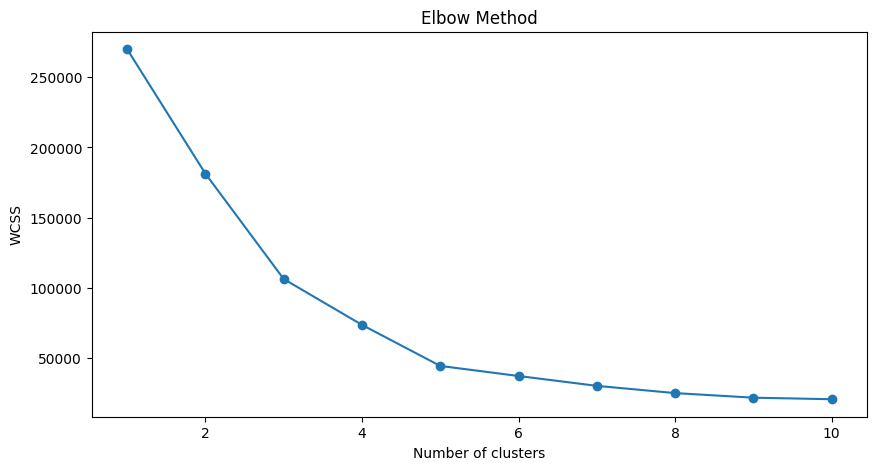

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(k, wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=0)
y = kmeans.fit_predict(x)+1

print(y)

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 5 4 5 2 5 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [ ]:
cent = kmeans.cluster_centers_

cent

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

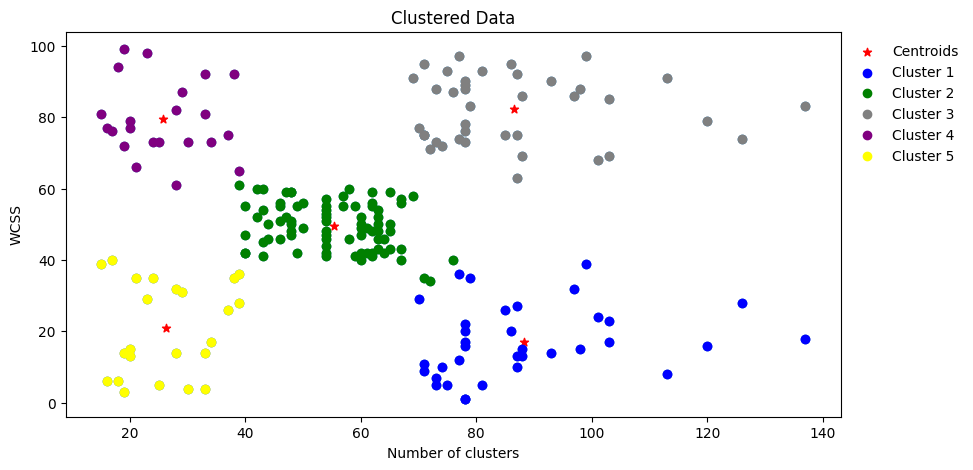

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(x[:, 0], x[:, 1])

plt.scatter(cent[:, 0], cent[:, 1], color = 'red', marker = '*', label = 'Centroids')

plt.scatter(x[y == 1, 0], x[y == 1, 1], color = 'blue', label = 'Cluster 1')
plt.scatter(x[y == 2, 0], x[y == 2, 1], color = 'green', label = 'Cluster 2')
plt.scatter(x[y == 3, 0], x[y == 3, 1], color = 'gray', label = 'Cluster 3')
plt.scatter(x[y == 4, 0], x[y == 4, 1], color = 'purple', label = 'Cluster 4')
plt.scatter(x[y == 5, 0], x[y == 5, 1], color = 'yellow', label = 'Cluster 5')

plt.title('Clustered Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.legend(bbox_to_anchor=(1,1), frameon=False)

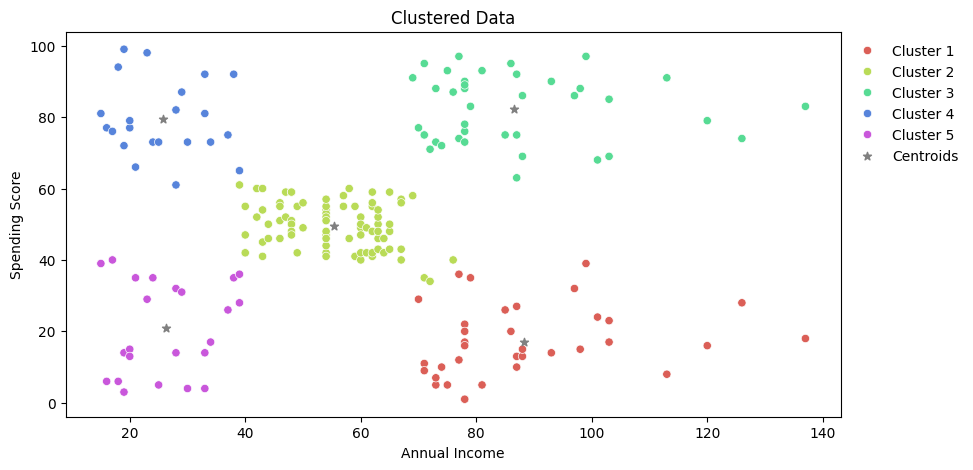

In [ ]:
df_kmeans = pd.DataFrame({'Annual_Income': x[:, 0], 'Spending_Score': x[:, 1], 'Clusters': y})

df_kmeans['Clusters'] = df_kmeans['Clusters'].apply(lambda x: "Cluster " + str(x))
df_kmeans.head()


plt.figure(figsize=(10, 5))

sns.scatterplot(data = df_kmeans, x = 'Annual_Income', y = 'Spending_Score',
                hue='Clusters', palette = sns.color_palette("hls", 5),
                hue_order = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

plt.scatter(cent[:, 0], cent[:, 1], color = 'gray', marker = '*', label = 'Centroids')

plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.legend(bbox_to_anchor=(1,1), frameon=False)

plt.show()